## Data augmentation

In [1]:
import numpy as np
import pandas as pd
import my_functions

In [2]:
%%bash
ls ./Used_data

TEST_IMAGES.npy
TEST_LABELS.npy
TRAIN_IMAGES.npy
TRAIN_LABELS.npy
VALID_IMAGES.npy
VALID_LABELS.npy


In [3]:
TRAIN_X = np.load('./Used_data/TRAIN_IMAGES.npy')
TRAIN_Y = np.load('./Used_data/TRAIN_LABELS.npy')
VALID_X = np.load('./Used_data/VALID_IMAGES.npy')
VALID_Y = np.load('./Used_data/VALID_LABELS.npy')
TEST_X = np.load('./Used_data/TEST_IMAGES.npy')
TEST_Y = np.load('./Used_data/TEST_LABELS.npy')

#### Data before augmentation:

In [4]:
pd.DataFrame(my_functions.data_description(TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, TEST_X , TEST_Y, convert=False))
# convert=False to show the data info once only 

,set name,shape,dtype,data sight
0,TRAIN_X,"(1600, 96, 96, 3)",uint8,"[87, 73, 37]"
1,TRAIN_Y,"(1600,)",uint8,2
2,VALID_X,"(500, 96, 96, 3)",uint8,"[204, 205, 210]"
3,VALID_Y,"(500,)",uint8,1
4,TEST_X,"(500, 96, 96, 3)",uint8,"[132, 167, 203]"
5,TEST_Y,"(500,)",uint8,1


#### Augmentation of TRAIN data:

In [5]:
import random
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

ILOSC_NOWYCH = 6400                                     # number of generated data

ZAKRES = 1600                                           # range of images for transformations

ETYKIETA = np.array([0])

import datetime
time_start = datetime.datetime.now()

for i in range (0, ILOSC_NOWYCH):
    INDEKS = random.randint(0, ZAKRES - 1)              # random choosen

    x = TRAIN_X[INDEKS]
    x = x.reshape((1,) + x.shape)
        
    j = 0
    for batch in datagen.flow(x, batch_size=1):
        
        j += 1
             
        NOWY = batch[0]                                 # new row
                                                        # NOWY.shape  (96, 96, 3)
                                                        # !!! NOWY.dtype  float32 
        NOWY = NOWY.astype(np.uint8)                    # changes the datatype from float32 into uint8
        
        NOWY = NOWY.reshape((1,) + NOWY.shape)          # fits the dimensions to dataset
                                                        # NOWY.shape  (1, 96, 96, 3) 
        TRAIN_X = np.vstack((TRAIN_X, NOWY))            # adds the complete row to IMAGES
        
        ETYKIETA[0] = TRAIN_Y[INDEKS]                   # takes the label of this image
                                                        # !!! ETYKIETA.dtype  int64
        ETYKIETA = ETYKIETA.astype(np.uint8)            # changes the datatype from int64 into uint8
        
        TRAIN_Y = np.hstack((TRAIN_Y, ETYKIETA))        # adds the label to labels
        
        if j % 1 == 0:
            break
    
time_stop = datetime.datetime.now()
print('Done')
print('Execution time:  ',time_stop-time_start)

Using TensorFlow backend.
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/fra

Done
Execution time:   0:09:36.776262


#### Data after augmentation:

In [6]:
pd.DataFrame(my_functions.data_description(TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, TEST_X , TEST_Y, convert=False))
# convert=False to show the data info once only 

,set name,shape,dtype,data sight
0,TRAIN_X,"(8000, 96, 96, 3)",uint8,"[87, 73, 37]"
1,TRAIN_Y,"(8000,)",uint8,2
2,VALID_X,"(500, 96, 96, 3)",uint8,"[204, 205, 210]"
3,VALID_Y,"(500,)",uint8,1
4,TEST_X,"(500, 96, 96, 3)",uint8,"[132, 167, 203]"
5,TEST_Y,"(500,)",uint8,1


#### Data balance check:

In [7]:
print('Percentage of planes in training set:', np.sum(TRAIN_Y==1)/len(TRAIN_Y)*100, '%')
print('Percentage of birds in training set:', np.sum(TRAIN_Y==2)/len(TRAIN_Y)*100, '%')

Percentage of planes in training set: 49.487500000000004 %
Percentage of birds in training set: 50.5125 %


#### Augmentation and labbeling correctness check (preview) for exemplary generated images:

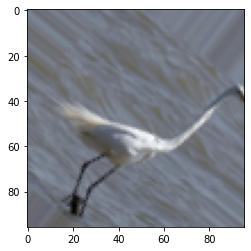

Bird


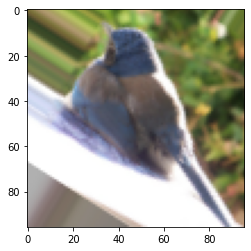

Bird


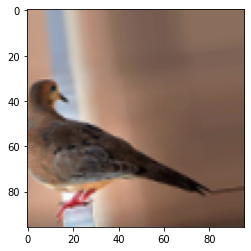

Bird


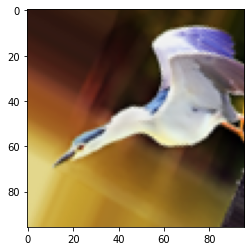

Bird


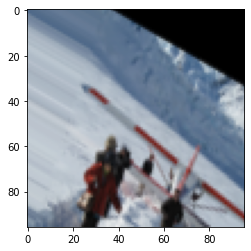

Plane


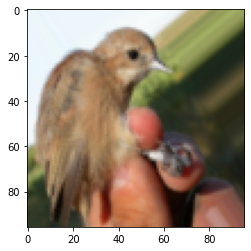

Bird


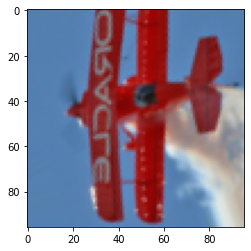

Plane


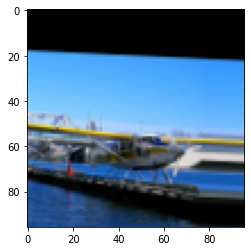

Plane


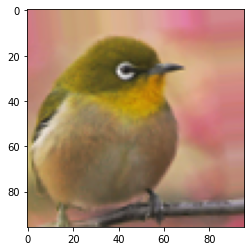

Bird


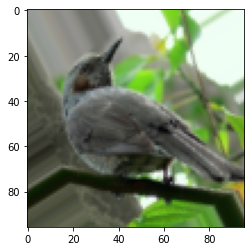

Bird


In [8]:
from matplotlib import pyplot
from PIL import Image

for i in range ((len(TRAIN_X)-11),(len(TRAIN_X)-1)):
    pyplot.imshow(Image.fromarray(TRAIN_X[i]))
    pyplot.show()
    if TRAIN_Y[i]==1:
        print('Plane')
    else:
        print('Bird')

In [9]:
# 8000 - uint8
np.save('./Used_data/TRAIN_X_EXTD', TRAIN_X)
np.save('./Used_data/TRAIN_Y_EXTD', TRAIN_Y)

In [10]:
%%bash
ls ./Used_data

TEST_IMAGES.npy
TEST_LABELS.npy
TRAIN_IMAGES.npy
TRAIN_LABELS.npy
TRAIN_X_EXTD.npy
TRAIN_Y_EXTD.npy
VALID_IMAGES.npy
VALID_LABELS.npy
